# Mind Map generator

In [82]:
import mindmap as mm
import networkx as nx
import re
import matplotlib.pyplot as plt

In [83]:
with open('./SampleData/sample_text2.txt', encoding="utf8") as f:
    input_text = f.readlines()
final_text = ''
for text in input_text:
    final_text += text

In [84]:
final_text = mm.clean_text(final_text)

In [85]:
def load_text(file_name_path, encoding="utf8"):
    with open(file_name_path, encoding=encoding) as f:
        input_text = f.readlines()
        f.close()
    final_text = ''
    for text in input_text:
        final_text += text
    final_text = mm.clean_text(final_text)
    
    return final_text

In [86]:
final_text

'The electric vehicle (EV) revolution is speeding up, but it can only go so far without the necessary infrastructure and technology. As thinking shifts from fossil fuels to all-electric, visions of a brighter, more optimistic world come into view. The UK government’s pledge to ban the sale of all new non-electric cars, including gasoline, diesel and hybrid vehicles from 2035, highlights the drive to end the nation’s contribution to Climate Change by 2050. If the 2035 target is to be met, we will all see evolutions in the transport and mobility routines that keep our lives moving. From using ultra-fast wireless charging to supporting the developing world by repurposing car batteries, WMG, at the University of Warwick, is delivering advances in electrification knowledge and technologies, which will enable the leap to an electric automotive future. So, for the now and the near future, what do we need to consider? Demand for EVs is surging in the UK and registrations of plug-in cars increa

In [87]:
text = mm.generate_summary(final_text, top_n=40)

In [88]:
text

'So all in all you have a heavy , inefficient , cumbersome part . Because they are large , they are also heavy , which means the vehicle consumes more energy in a journey . Then , for safety reasons , currently affordable traction batteries need to have a high level of complexity . WMG ’ s involvement in the Nextrode project , funded by The Faraday Institution , is tackling this . As thinking shifts from fossil fuels to all-electric , visions of a brighter , more optimistic world come into view . So , for the now and the near future , what do we need to consider ? “ We aim to develop and integrate within a vehicle , a battery system based on a mixture of highly energy dense solid-state cells and high power density cells , ” says Greenwood . The electric vehicle ( EV ) revolution is speeding up , but it can only go so far without the necessary infrastructure and technology . The relationship between the charging infrastructure and the manufacture of the batteries is key , especially whe

In [89]:
keywords, topics = mm.create_keywords_from_text(final_text, max_nodes=5, sentence_group=4)

In [90]:
topics

{0: 'car',
 1: 'battery',
 2: 'need',
 3: 'charging',
 4: 'performance',
 5: 'cell',
 6: 'electric',
 7: 'project',
 8: 'road',
 9: 'current'}

In [91]:
for idx in range(len(keywords)):
    print(keywords[idx])

['repurposing car batteries', 'fast wireless charging', 'electric automotive future', 'near future', 'using ultra', 'supporting', 'need']
[]
['key ,” explains greenwood', 'class energy densities mean', 'desired electric range capability', 'efficient battery charging infrastructure', 'long charging times', 'need', 'technology']
['consumers ’ typical mobility behaviours', 'short journeys somewhat counteracts', 'robust battery charging infrastructure', 'deliver 300 miles', 'charging infrastructure', 'technology', 'consumers']
[]
['high power density cells ,” says greenwood', 'currently affordable traction batteries need', 'highly energy dense solid', 'cumbersome part .“', 'battery system based']
[]
['existing solutions .” although efficiency', 'zero ’ strategy — aiming', 'conventional vehicles offer today according', 'includes project partner a123 systems', '£ 2m innovate uk', 'supporting', 'consumers']
[]
[]


In [92]:
sent = 'key ,” explains greenwood'

In [93]:
re.sub('[^\d\w\s]', '', sent).strip()

'key  explains greenwood'

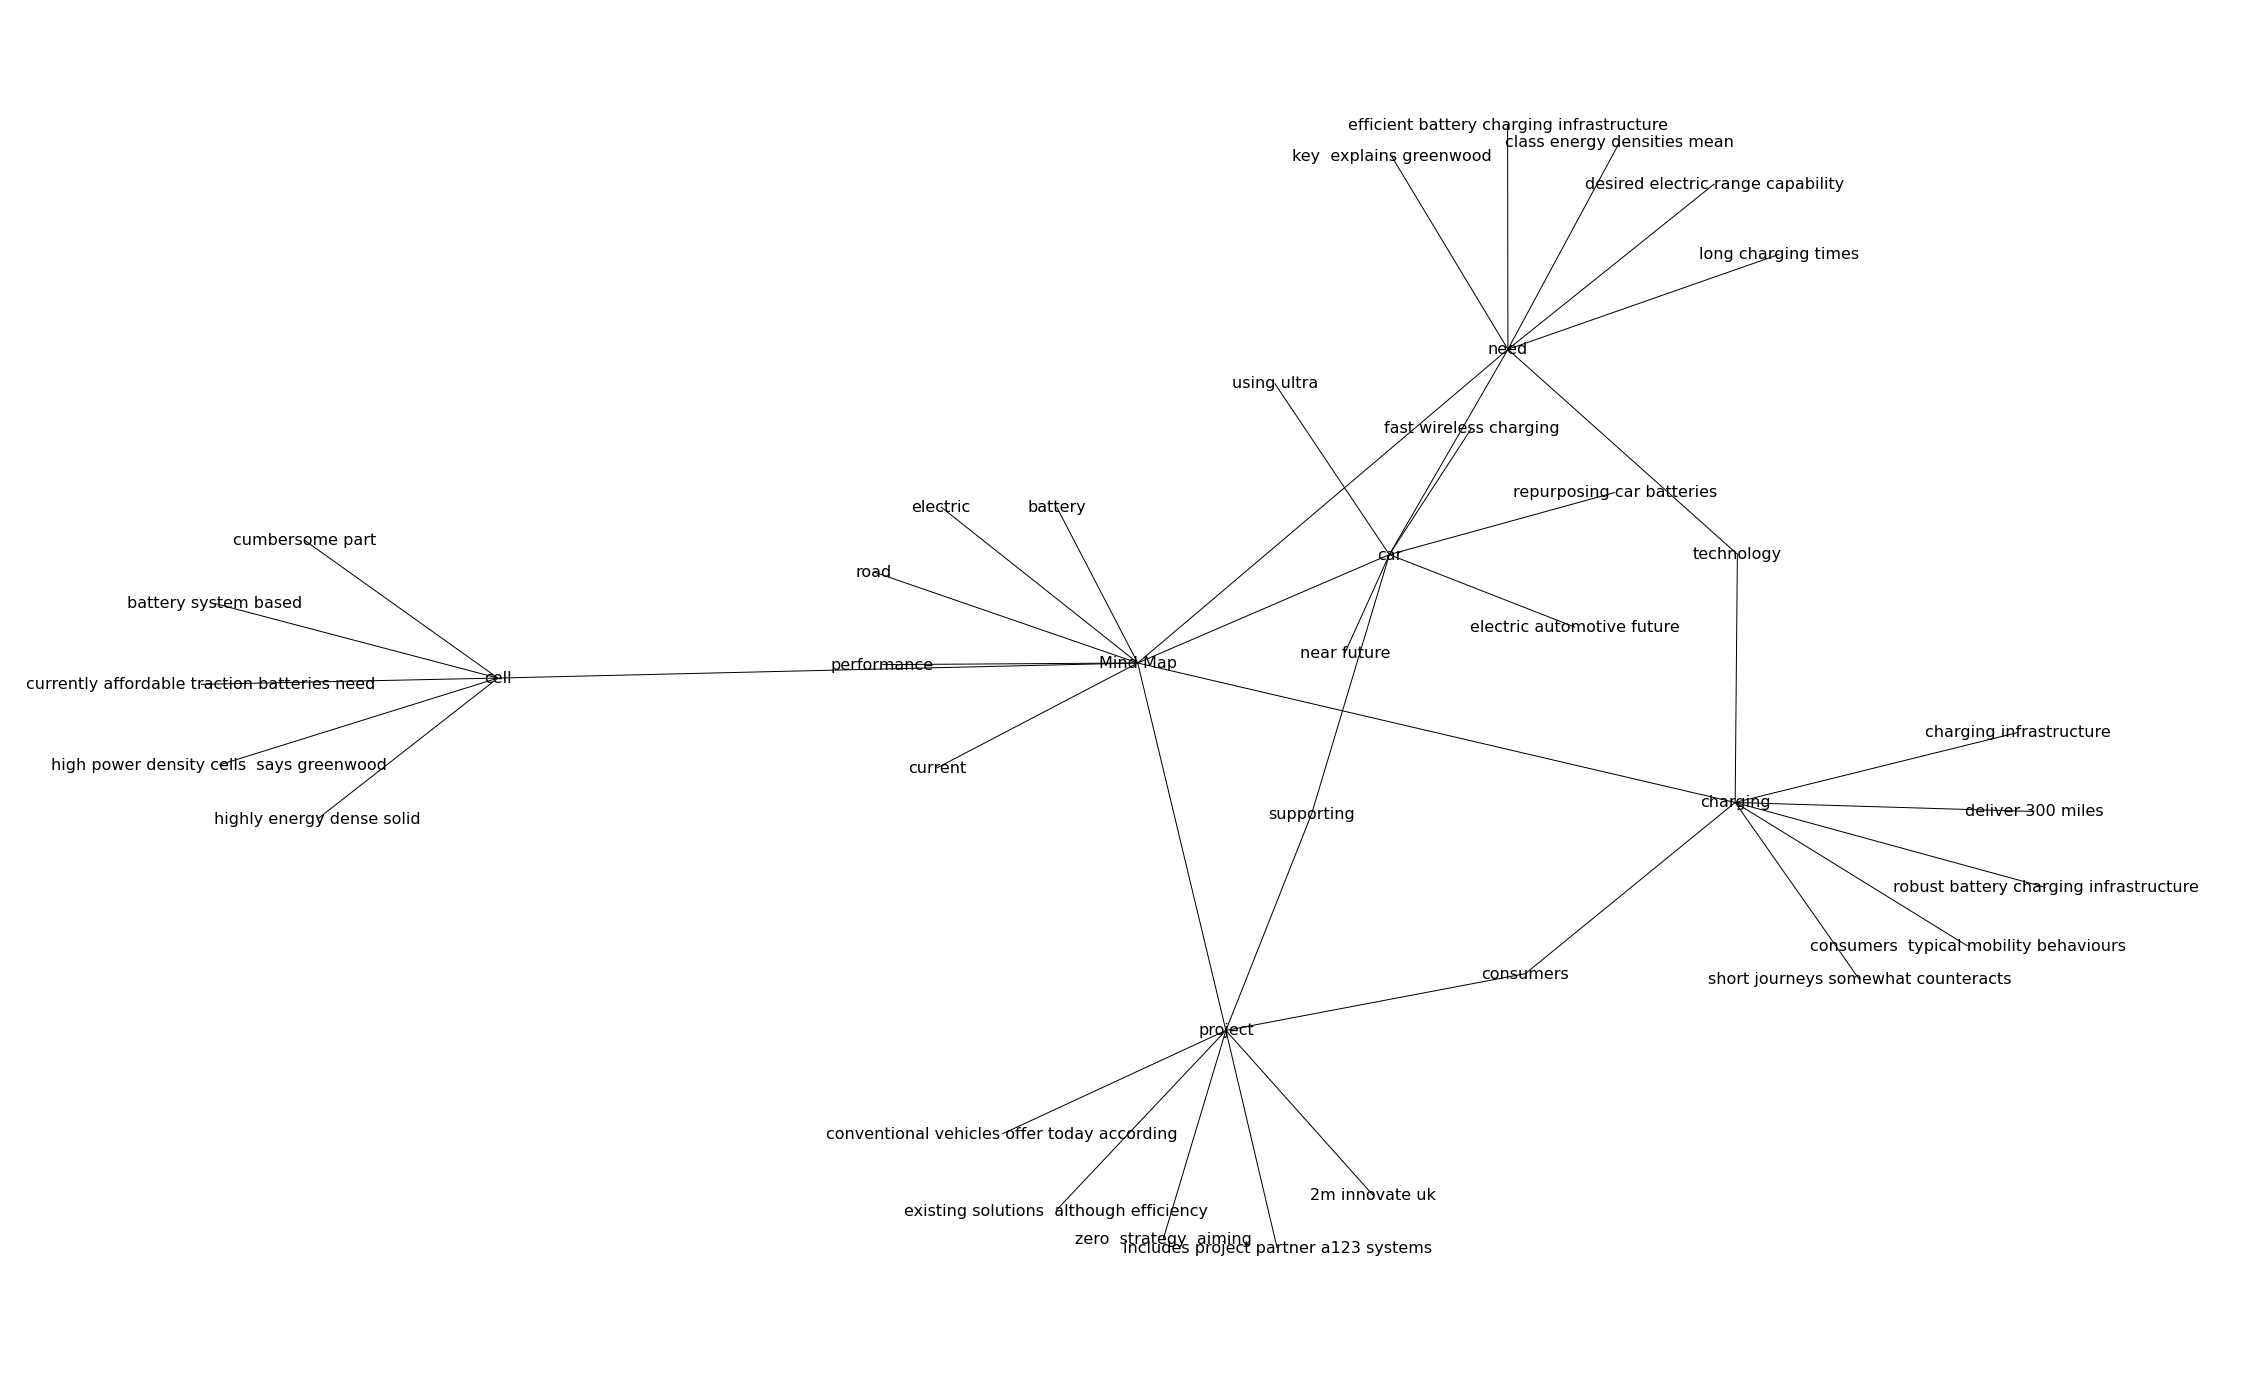

In [94]:
fig, ax = plt.subplots(figsize=(40,25))
G = nx.Graph()
G.add_node('Mind Map')
reg_exp_pattern = "[^\d\w\s]"
for idx in topics:
    main_topic = re.sub(reg_exp_pattern, '', topics[idx]).strip()
    G.add_edge('Mind Map', main_topic)
    topic_keywords = keywords[idx]
    for keyword in topic_keywords:
        keyword = re.sub(reg_exp_pattern, '', keyword).strip()
        if(keyword != main_topic):
            G.add_edge(main_topic, keyword)
        
nx.draw(G, with_labels=True, node_size=0, font_size = 16, )
plt.show()
# plt.savefig('second_mindmap.png')

In [95]:
final_text = load_text('./SampleData/sample_text.txt')

In [96]:
def get_mindmap(keywords, topics):
    fig, ax = plt.subplots(figsize=(40,25))
    G = nx.Graph()
    G.add_node('Mind Map')
    reg_exp_pattern = "[^\d\w\s]"
    for idx in topics:
        main_topic = re.sub(reg_exp_pattern, '', topics[idx]).strip()
        G.add_edge('Mind Map', main_topic)
        topic_keywords = keywords[idx]
        for keyword in topic_keywords:
            keyword = re.sub(reg_exp_pattern, '', keyword).strip()
            if(keyword != re.sub(reg_exp_pattern, '', topics[idx]).strip()):
                G.add_edge(main_topic, keyword)

    nx.draw(G, with_labels=True, node_size=0, font_size = 16, )
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Acer\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

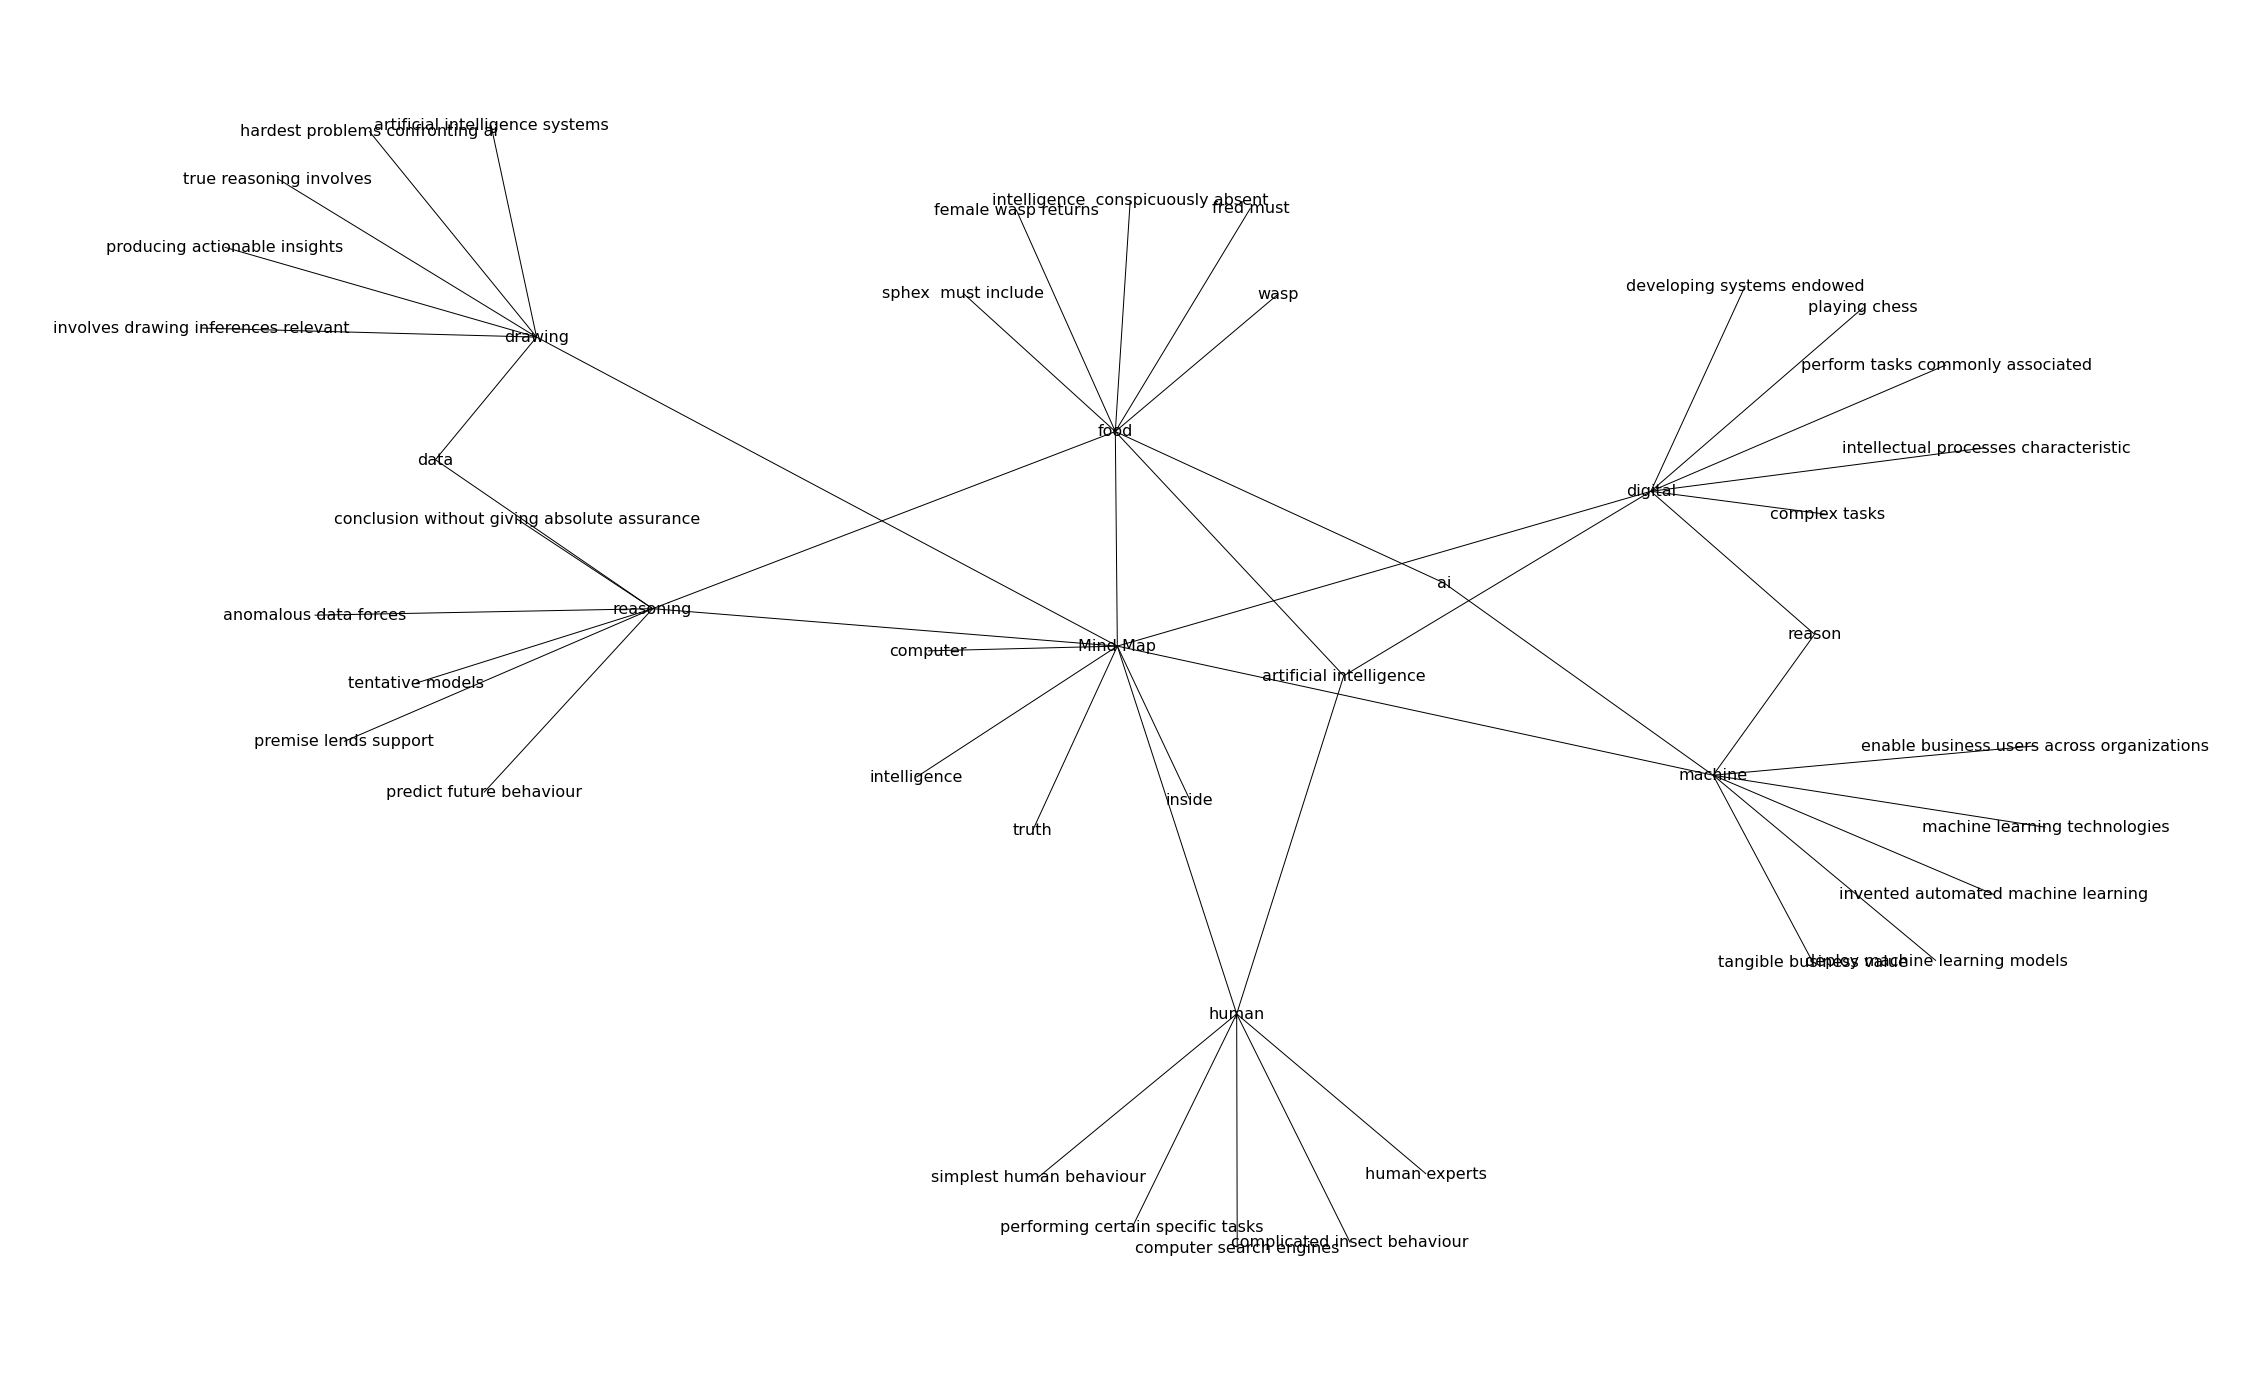

In [97]:
keywords2, topics2 = mm.create_keywords_from_text(final_text, max_nodes=5, sentence_group=4)
get_mindmap(keywords2, topics2)

## Web scrapped Example

In [98]:
scraped_data = mm.scrape_data('https://en.wikipedia.org/wiki/Wikipedia:About')
final_text = mm.clean_text(scraped_data)
summary = mm.generate_summary(final_text, top_n=40)
summary

"Anyone is allowed to add or edit text , references , images , and other media here . Since its creation on January 15 , 2001 , Wikipedia has grown into the world 's largest reference website , attracting over a billion visitors monthly . Over time , Wikipedia 's pages tend to become more comprehensive and balanced . It must conform with Wikipedia 's policies , including being verifiable against a published reliable source . Editors ' opinions , beliefs , and unreviewed research will not remain . Its contributors improve the quality and quantity of the articles as well as remove misinformation , errors , and vandalism . Wikipedia has tested the wisdom of the crowd since 2001 , and found that it succeeds . Contributions can not damage Wikipedia , as its software allows easy reversal of errors , and many experienced editors watch to ensure that edits are improvements . The Wikipedia community has developed many policies and guidelines , with which familiarity is not a requirement for con

<module 'matplotlib.pyplot' from 'C:\\Users\\Acer\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

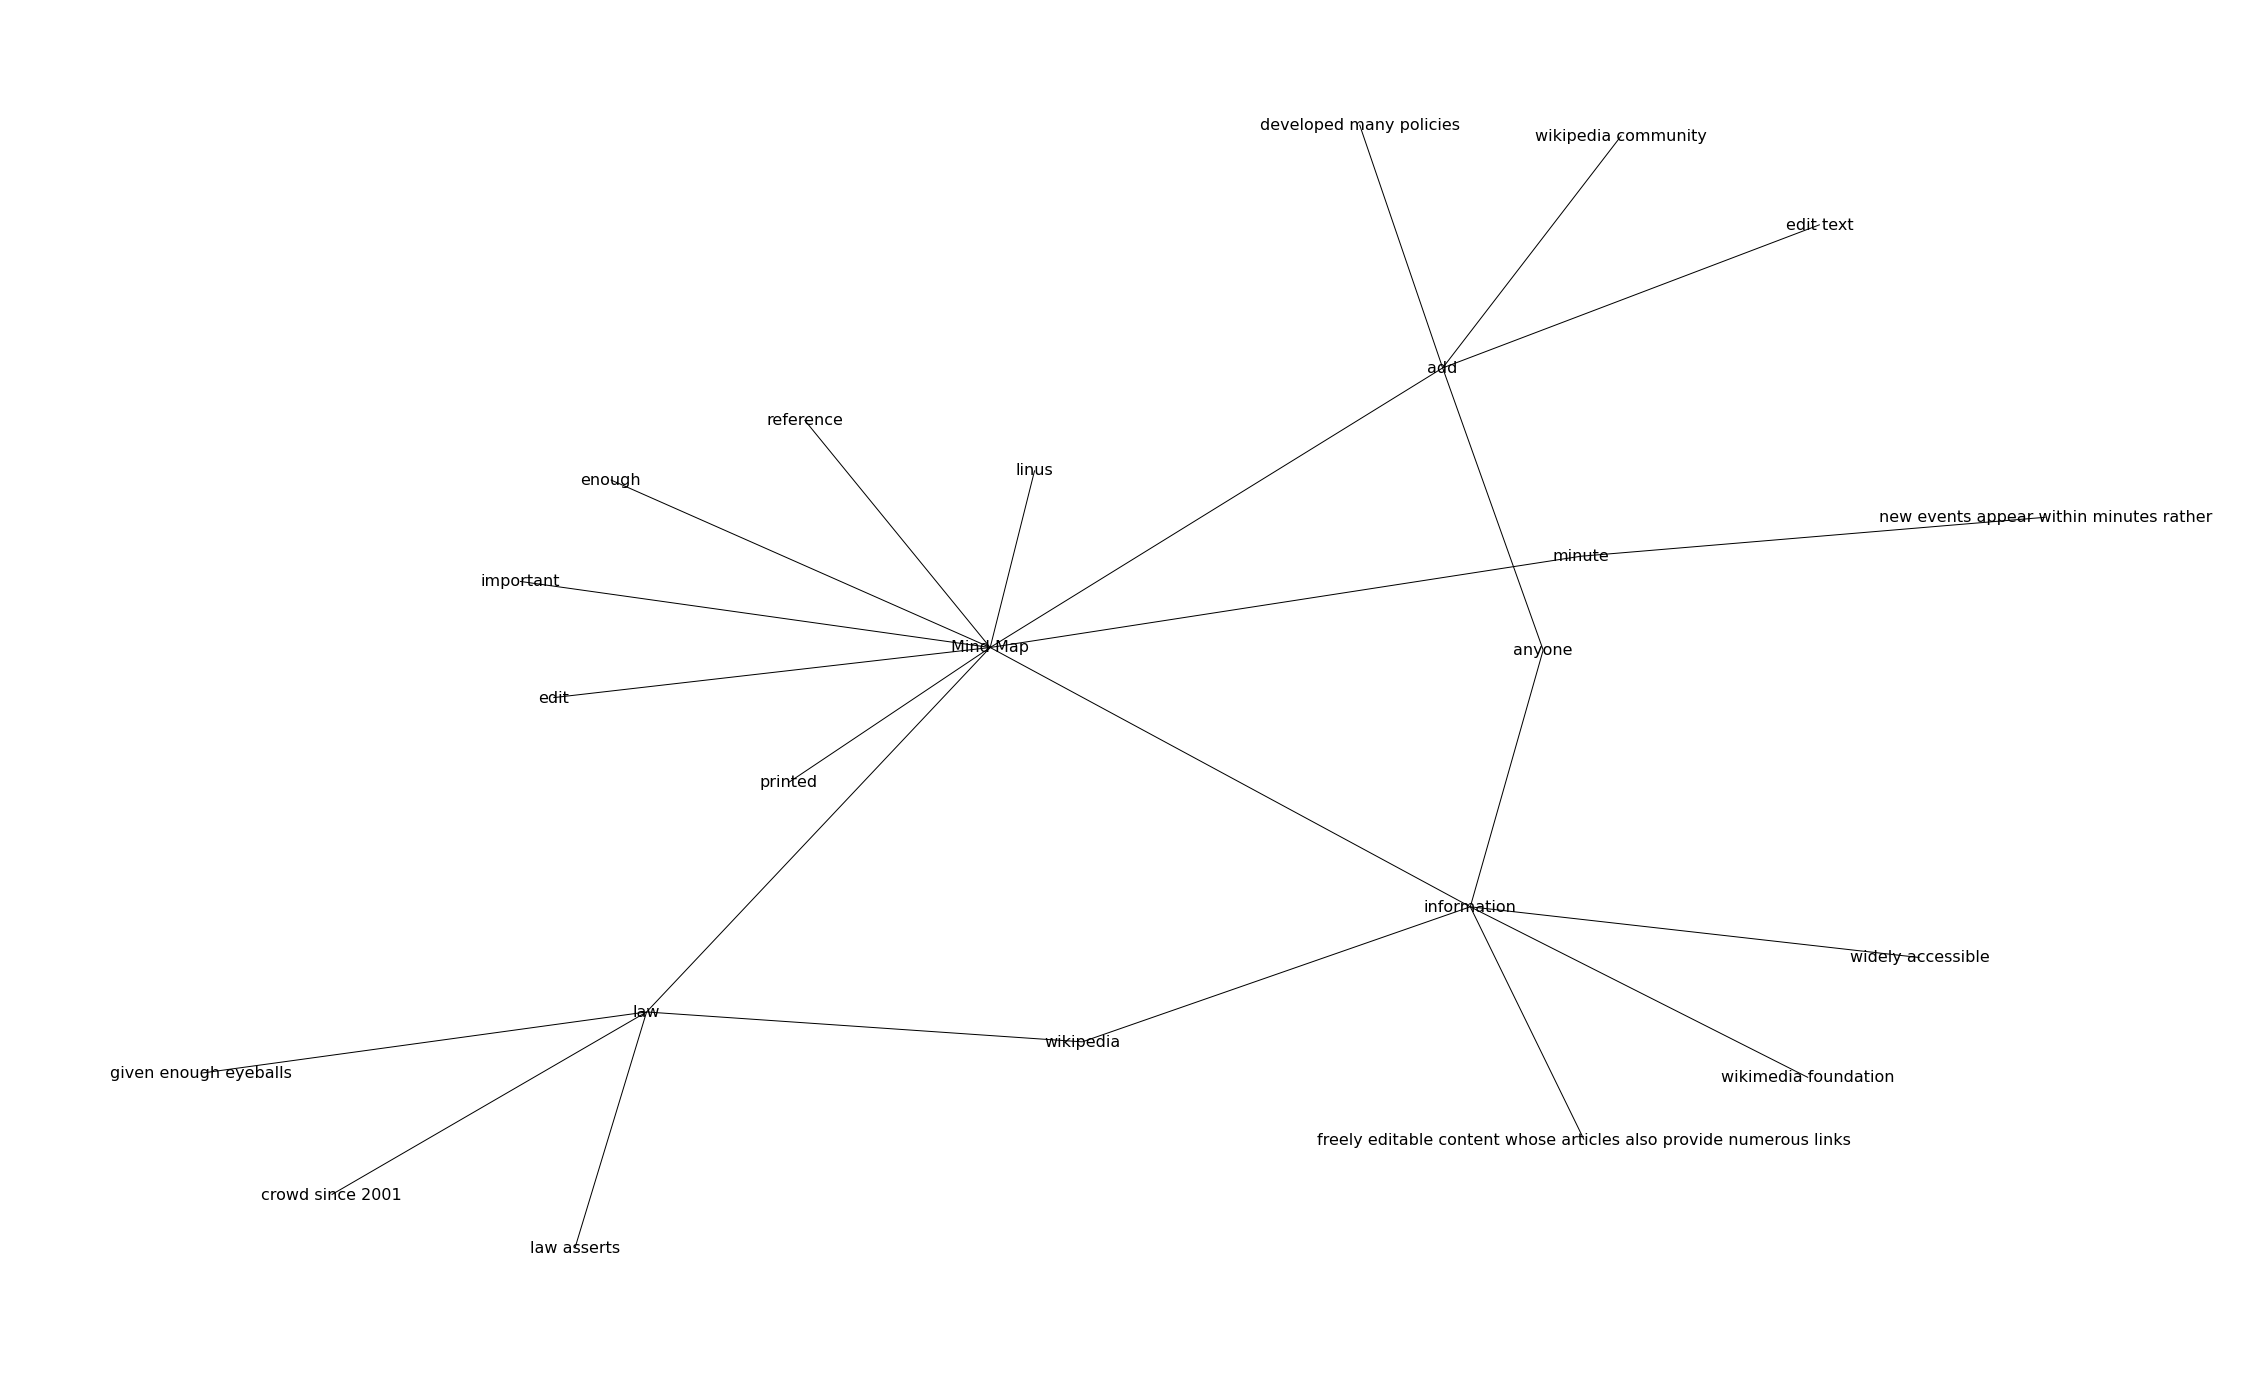

In [99]:
keywords2, topics2 = mm.create_keywords_from_text(final_text, max_nodes=3, sentence_group=7)
get_mindmap(keywords2, topics2)